25.0 % done
50.0 % done
75.0 % done


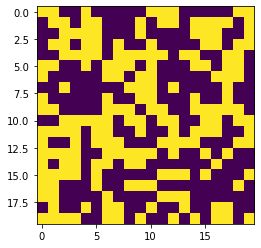

In [1]:
from __future__ import division, print_function
import numpy as np
import random as rand
import pylab as plt

def deltaU(i, j):

    
    top = s[size-1,j] if i==0 else s[i-1,j]
    bottom = s[0,j] if i==size-1 else s[i+1,j]
    left = s[i, size-1] if j==0 else s[i,j-1]
    right = s[i,0] if j==size-1 else s[i,j+1]
    Ediff = 2*s[i,j]*(top+bottom+left+right)
    return Ediff

def initialize():
    for i in range(size):
        for j in range(size):
            s[i,j] = 1 if rand.random()<0.5 else -1

            
size = 20 # Size of the square lattice
T = 10 # Temperature in units of epsilon/k
upperLimit = 1000*size*size # Each dipole is flipped an
# average 1000 times
s = np.zeros((size, size), dtype=int) # Create the lattice as a 2D array
initialize() # Initialize the array
plt.figure() # Initialize the plot

for iteration in range(1, upperLimit): # The main iteration loop
    i = rand.randint(0, size-1) # Choose a random dipole
    j = rand.randint(0, size-1)
    Ediff = deltaU(i, j) # Compute the energy change of a
    # hypothetical flip
    if Ediff <= 0: # Flip the dipole if energy is reduced
        s[i,j] = -s[i,j]
    else: # Else, the Boltzmann factor gives
        if rand.random() < np.exp(-Ediff/T): # the probability of flipping
            s[i,j] = -s[i,j]
    if iteration % 100000 == 0:
        print((iteration/upperLimit)*100, "% done")
        
        
plt.imshow(s, interpolation='nearest') # Plot the final configuration
plt.show()